# Data Preprocessing and Cleaning Pipeline

This notebook demonstrates the comprehensive data preprocessing pipeline for the heart disease dataset, including:
- Data cleaning and missing value handling
- Categorical variable encoding
- Feature scaling
- Outlier detection and treatment
- Train/test splitting

## Setup and Imports

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add src directory to path
sys.path.append('../src')

from data_processor import DataProcessor

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Setup complete!")

Setup complete!


## 1. Load and Examine Raw Data

In [2]:
# Initialize data processor
processor = DataProcessor()

# Load the heart disease dataset
data_path = '../data/processed/heart_disease.csv'
raw_data = processor.load_data(data_path)

print(f"Dataset shape: {raw_data.shape}")
print(f"\nColumn names: {list(raw_data.columns)}")
print(f"\nFirst 5 rows:")
raw_data.head()

2025-08-30 00:40:55 - data_processor - INFO - Loading data from ../data/processed/heart_disease.csv
2025-08-30 00:40:55 - data_processor - INFO - Successfully loaded 303 records with 14 columns
Dataset shape: (303, 14)

Column names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Check for missing values and data quality issues
print("Missing values per column:")
missing_counts = raw_data.isnull().sum()
print(missing_counts[missing_counts > 0])

# Check for '?' values (another form of missing data)
print("\nColumns with '?' values:")
for col in raw_data.columns:
    question_marks = (raw_data[col].astype(str) == '?').sum()
    if question_marks > 0:
        print(f"{col}: {question_marks} '?' values")

Missing values per column:
ca      4
thal    2
dtype: int64

Columns with '?' values:


In [4]:
# Validate data quality
validation_result = processor.validate_data()

print(f"Data validation passed: {validation_result['is_valid']}")
print(f"\nIssues found: {len(validation_result['issues'])}")
for issue in validation_result['issues']:
    print(f"- {issue}")

print(f"\nDataset statistics:")
for key, value in validation_result['statistics'].items():
    print(f"- {key}: {value}")

2025-08-30 00:41:30 - data_processor - INFO - Starting data validation
2025-08-30 00:41:30 - data_processor - WARNING - Missing values detected: {'ca': 4, 'thal': 2}
2025-08-30 00:41:30 - data_processor - WARNING - Data validation failed with 1 issues
Data validation passed: False

Issues found: 1
- Found 6 missing values

Dataset statistics:
- total_records: 303
- total_features: 14
- duplicate_rows: 0
- memory_usage_mb: 0.032774925231933594


## 2. Data Cleaning

In [5]:
# Clean the data
cleaned_data = processor.clean_data(raw_data)

print(f"Original shape: {raw_data.shape}")
print(f"Cleaned shape: {cleaned_data.shape}")

# Check missing values after cleaning
print(f"\nMissing values after cleaning: {cleaned_data.isnull().sum().sum()}")

# Check target variable transformation
print(f"\nTarget variable distribution (before cleaning):")
print(raw_data['target'].value_counts().sort_index())

print(f"\nTarget variable distribution (after cleaning - binary):")
print(cleaned_data['target'].value_counts().sort_index())

2025-08-30 00:41:42 - data_processor - INFO - Starting data cleaning process
2025-08-30 00:41:42 - data_processor - INFO - Found 6 missing values before cleaning
2025-08-30 00:41:42 - data_processor - INFO - Imputed ca missing values with mode: 0.0
2025-08-30 00:41:42 - data_processor - INFO - Imputed thal missing values with mode: 3.0
2025-08-30 00:41:42 - data_processor - INFO - Missing values after cleaning: 0
2025-08-30 00:41:42 - data_processor - INFO - Converted target to binary classification (0: no disease, 1: disease)
Original shape: (303, 14)
Cleaned shape: (303, 14)

Missing values after cleaning: 0

Target variable distribution (before cleaning):
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: Int64

Target variable distribution (after cleaning - binary):
target
0    164
1    139
Name: count, dtype: int64


## 3. Categorical Encoding

In [6]:
# Encode categorical variables
encoded_data, encoding_info = processor.encode_categorical(cleaned_data)

print("Encoding information:")
for col, info in encoding_info.items():
    print(f"- {col}: {info['type']} encoding, values: {info['values']}")

# Compare data types before and after encoding
print(f"\nData types after encoding:")
print(encoded_data.dtypes)

2025-08-30 00:41:55 - data_processor - INFO - Starting categorical encoding
2025-08-30 00:41:55 - data_processor - INFO - Encoded categorical variables: ['sex', 'fbs', 'exang', 'cp', 'restecg', 'slope', 'ca', 'thal']
Encoding information:
- sex: binary encoding, values: [0, 1]
- fbs: binary encoding, values: [0, 1]
- exang: binary encoding, values: [0, 1]
- cp: ordinal encoding, values: [1, 2, 3, 4]
- restecg: ordinal encoding, values: [0, 1, 2]
- slope: ordinal encoding, values: [1, 2, 3]
- ca: categorical encoding, values: [0, 1, 2, 3]
- thal: categorical encoding, values: [3, 6, 7]

Data types after encoding:
age         float64
sex           int32
cp            int32
trestbps    float64
chol        float64
fbs           int32
restecg       int32
thalach     float64
exang         int32
oldpeak     float64
slope         int32
ca            int32
thal          int32
target        int32
dtype: object


## 4. Outlier Detection and Treatment

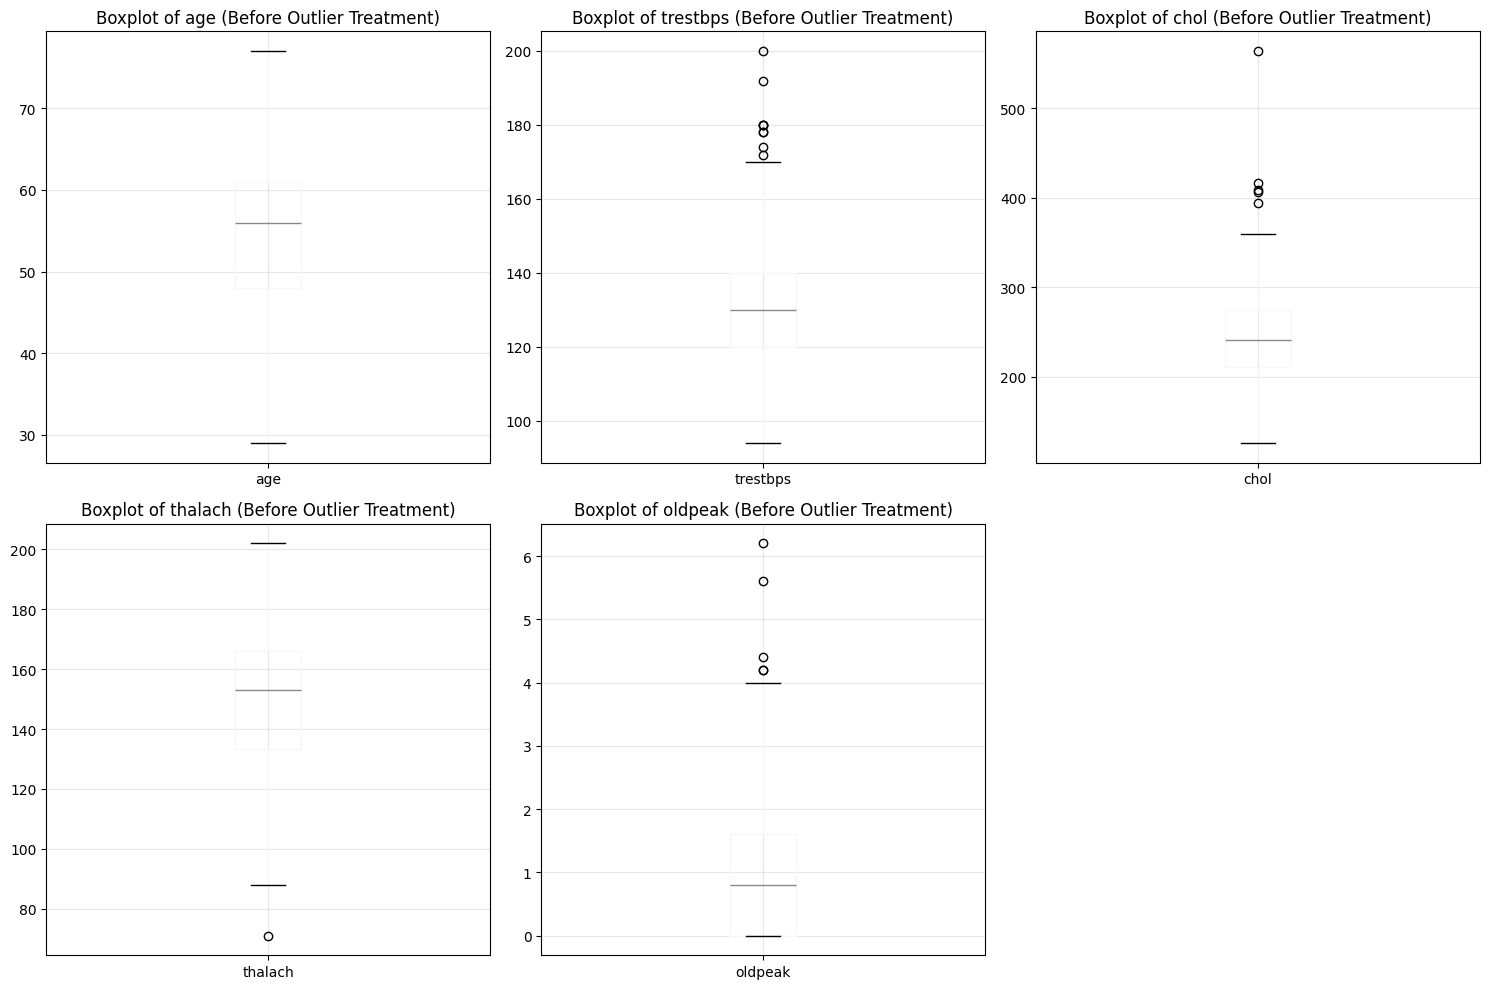

In [7]:
# Visualize potential outliers before treatment
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        encoded_data.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col} (Before Outlier Treatment)')
        axes[i].grid(True, alpha=0.3)

# Remove empty subplot
if len(numerical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [8]:
# Handle outliers
outlier_handled_data = processor.handle_outliers(encoded_data)

print(f"Data shape after outlier handling: {outlier_handled_data.shape}")

# Compare statistics before and after outlier treatment
print("\nStatistics comparison (before vs after outlier treatment):")
for col in numerical_cols:
    if col in encoded_data.columns:
        before_stats = encoded_data[col].describe()
        after_stats = outlier_handled_data[col].describe()
        
        print(f"\n{col}:")
        print(f"  Min: {before_stats['min']:.2f} -> {after_stats['min']:.2f}")
        print(f"  Max: {before_stats['max']:.2f} -> {after_stats['max']:.2f}")
        print(f"  Mean: {before_stats['mean']:.2f} -> {after_stats['mean']:.2f}")
        print(f"  Std: {before_stats['std']:.2f} -> {after_stats['std']:.2f}")

2025-08-30 00:42:30 - data_processor - INFO - Detecting outliers using iqr method
2025-08-30 00:42:30 - data_processor - INFO - Columns for outlier detection: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
2025-08-30 00:42:30 - data_processor - INFO - Capped 9 outliers in trestbps to bounds [90.00, 170.00]
2025-08-30 00:42:30 - data_processor - INFO - Capped 5 outliers in chol to bounds [115.00, 371.00]
2025-08-30 00:42:30 - data_processor - INFO - Capped 1 outliers in thalach to bounds [84.75, 214.75]
2025-08-30 00:42:30 - data_processor - INFO - Capped 5 outliers in oldpeak to bounds [-2.40, 4.00]
2025-08-30 00:42:30 - data_processor - INFO - Total outliers handled: 20
Data shape after outlier handling: (303, 14)

Statistics comparison (before vs after outlier treatment):

age:
  Min: 29.00 -> 29.00
  Max: 77.00 -> 77.00
  Mean: 54.44 -> 54.44
  Std: 9.04 -> 9.04

trestbps:
  Min: 94.00 -> 94.00
  Max: 200.00 -> 170.00
  Mean: 131.69 -> 131.35
  Std: 17.60 -> 16.65

chol:
  Min: 1

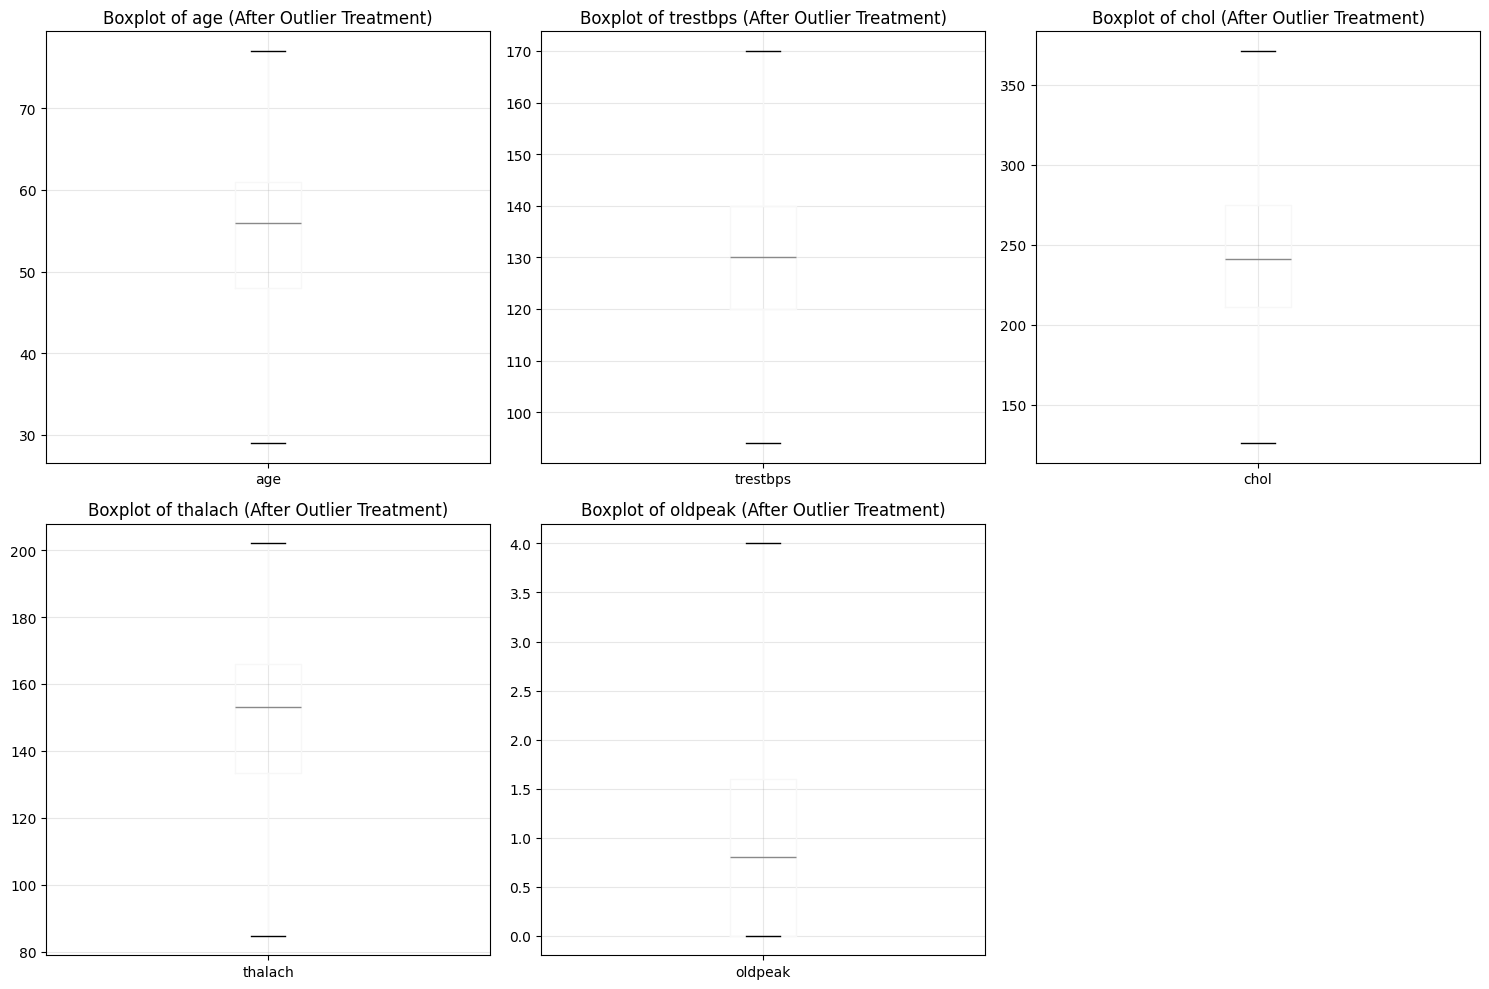

In [9]:
# Visualize data after outlier treatment
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        outlier_handled_data.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col} (After Outlier Treatment)')
        axes[i].grid(True, alpha=0.3)

# Remove empty subplot
if len(numerical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## 5. Feature Scaling

In [10]:
# Split features and target
X, y = processor.split_features_target(outlier_handled_data)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nTarget distribution: {y.value_counts().to_dict()}")

2025-08-30 00:42:58 - data_processor - INFO - Split data into features (13 columns) and target
2025-08-30 00:42:58 - data_processor - INFO - Feature columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
2025-08-30 00:42:58 - data_processor - INFO - Target distribution: {0: 164, 1: 139}
Features shape: (303, 13)
Target shape: (303,)

Feature columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Target distribution: {0: 164, 1: 139}


2025-08-30 00:43:06 - data_processor - INFO - Scaling features using standard scaler
2025-08-30 00:43:06 - data_processor - INFO - Columns to scale: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
2025-08-30 00:43:06 - data_processor - INFO - Successfully scaled 13 features
2025-08-30 00:43:06 - data_processor - INFO - Scaling features using minmax scaler
2025-08-30 00:43:06 - data_processor - INFO - Columns to scale: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
2025-08-30 00:43:06 - data_processor - INFO - Successfully scaled 13 features


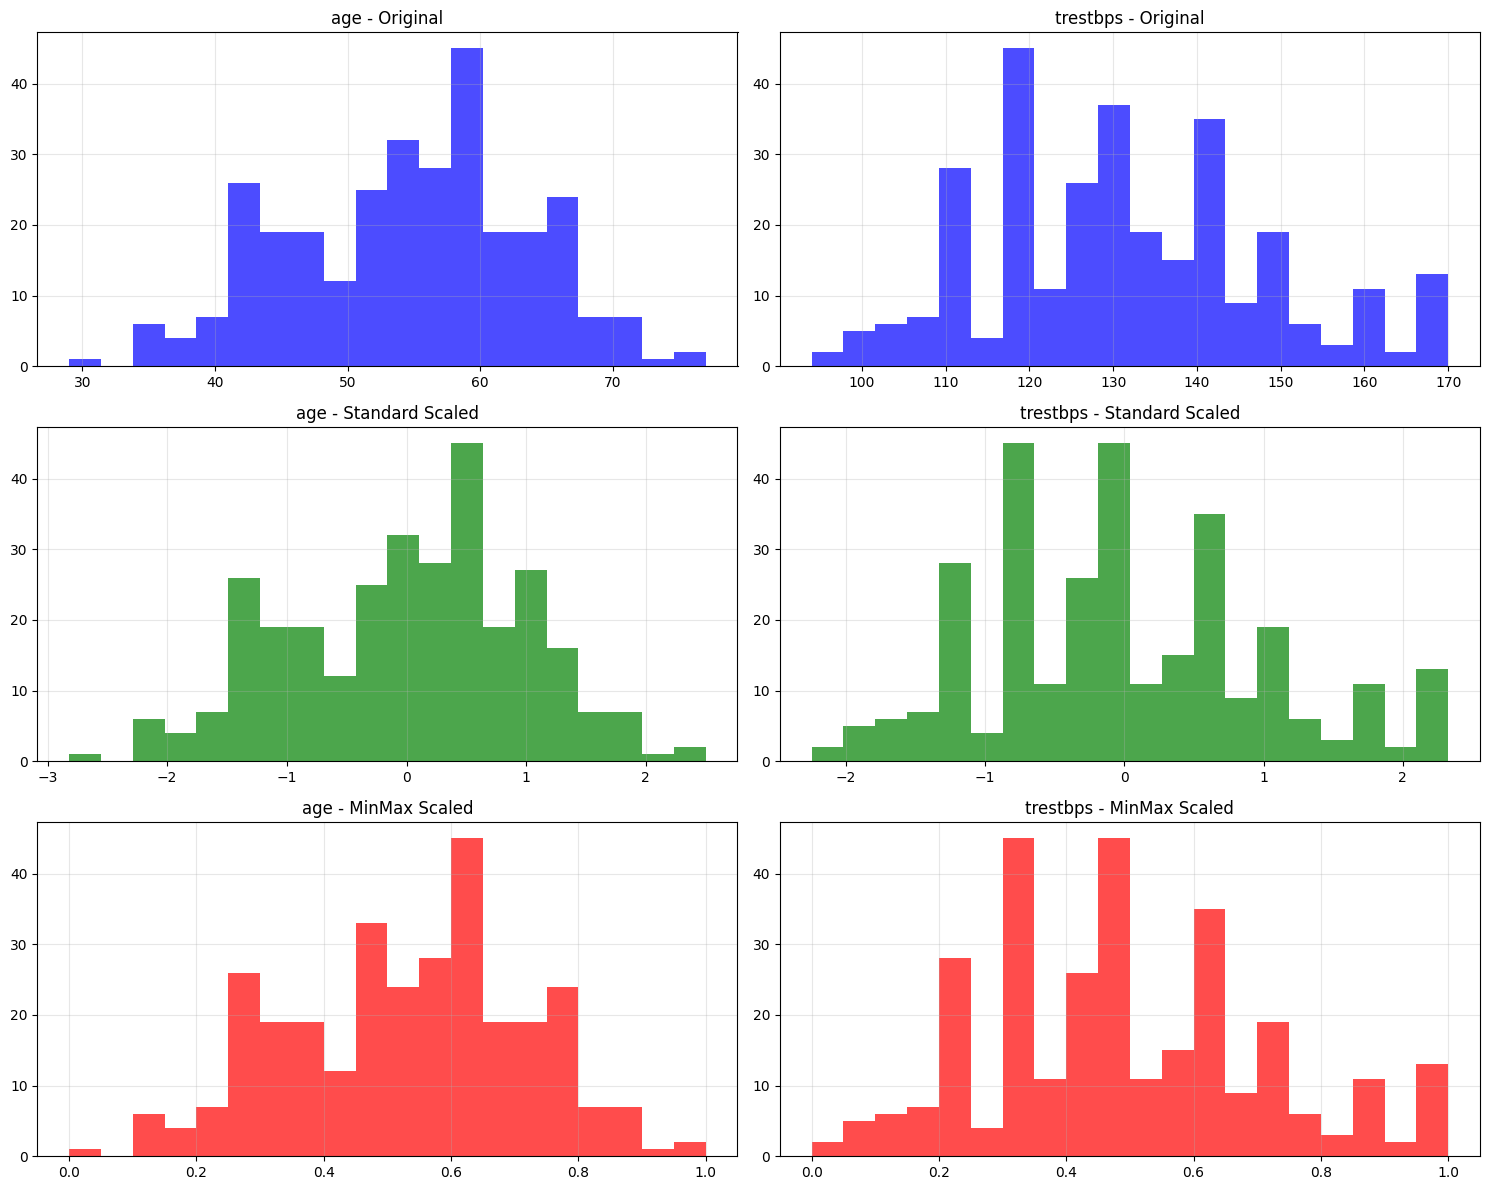

Scaling statistics for 'age' column:
Original - Mean: 54.44, Std: 9.04, Min: 29.00, Max: 77.00
Standard - Mean: -0.00, Std: 1.00, Min: -2.82, Max: 2.50
MinMax   - Mean: 0.53, Std: 0.19, Min: 0.00, Max: 1.00


In [11]:
# Compare different scaling methods
X_standard, scaler_standard = processor.scale_features(X, method='standard')
X_minmax, scaler_minmax = processor.scale_features(X, method='minmax')

# Visualize scaling effects
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Select a few columns for visualization
viz_cols = ['age', 'trestbps', 'chol', 'thalach']

for i, col in enumerate(viz_cols[:2]):
    # Original data
    axes[0, i].hist(X[col], bins=20, alpha=0.7, color='blue')
    axes[0, i].set_title(f'{col} - Original')
    axes[0, i].grid(True, alpha=0.3)
    
    # Standard scaled
    axes[1, i].hist(X_standard[col], bins=20, alpha=0.7, color='green')
    axes[1, i].set_title(f'{col} - Standard Scaled')
    axes[1, i].grid(True, alpha=0.3)
    
    # MinMax scaled
    axes[2, i].hist(X_minmax[col], bins=20, alpha=0.7, color='red')
    axes[2, i].set_title(f'{col} - MinMax Scaled')
    axes[2, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print scaling statistics
print("Scaling statistics for 'age' column:")
print(f"Original - Mean: {X['age'].mean():.2f}, Std: {X['age'].std():.2f}, Min: {X['age'].min():.2f}, Max: {X['age'].max():.2f}")
print(f"Standard - Mean: {X_standard['age'].mean():.2f}, Std: {X_standard['age'].std():.2f}, Min: {X_standard['age'].min():.2f}, Max: {X_standard['age'].max():.2f}")
print(f"MinMax   - Mean: {X_minmax['age'].mean():.2f}, Std: {X_minmax['age'].std():.2f}, Min: {X_minmax['age'].min():.2f}, Max: {X_minmax['age'].max():.2f}")

## 6. Complete Preprocessing Workflow

In [12]:
# Run complete preprocessing workflow
preprocessing_result = processor.preprocess_data(
    df=raw_data,
    test_size=0.2,
    random_state=42,
    scaling_method='standard'
)

print("Preprocessing completed successfully!")
print(f"\nPreprocessing statistics:")
stats = preprocessing_result['preprocessing_stats']
for key, value in stats.items():
    print(f"- {key}: {value}")

2025-08-30 00:43:38 - data_processor - INFO - Starting complete preprocessing workflow
2025-08-30 00:43:38 - data_processor - INFO - Starting data cleaning process
2025-08-30 00:43:38 - data_processor - INFO - Found 6 missing values before cleaning
2025-08-30 00:43:38 - data_processor - INFO - Imputed ca missing values with mode: 0.0
2025-08-30 00:43:38 - data_processor - INFO - Imputed thal missing values with mode: 3.0
2025-08-30 00:43:38 - data_processor - INFO - Missing values after cleaning: 0
2025-08-30 00:43:38 - data_processor - INFO - Converted target to binary classification (0: no disease, 1: disease)
2025-08-30 00:43:38 - data_processor - INFO - Starting categorical encoding
2025-08-30 00:43:38 - data_processor - INFO - Encoded categorical variables: ['sex', 'fbs', 'exang', 'cp', 'restecg', 'slope', 'ca', 'thal']
2025-08-30 00:43:38 - data_processor - INFO - Detecting outliers using iqr method
2025-08-30 00:43:38 - data_processor - INFO - Columns for outlier detection: ['ag

In [13]:
# Examine the processed datasets
X_train = preprocessing_result['X_train']
X_test = preprocessing_result['X_test']
y_train = preprocessing_result['y_train']
y_test = preprocessing_result['y_test']

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples, {X_test.shape[1]} features")

print(f"\nTraining target distribution: {y_train.value_counts().to_dict()}")
print(f"Test target distribution: {y_test.value_counts().to_dict()}")

print(f"\nFeature names: {preprocessing_result['feature_names']}")

Training set: 242 samples, 13 features
Test set: 61 samples, 13 features

Training target distribution: {0: 131, 1: 111}
Test target distribution: {0: 33, 1: 28}

Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


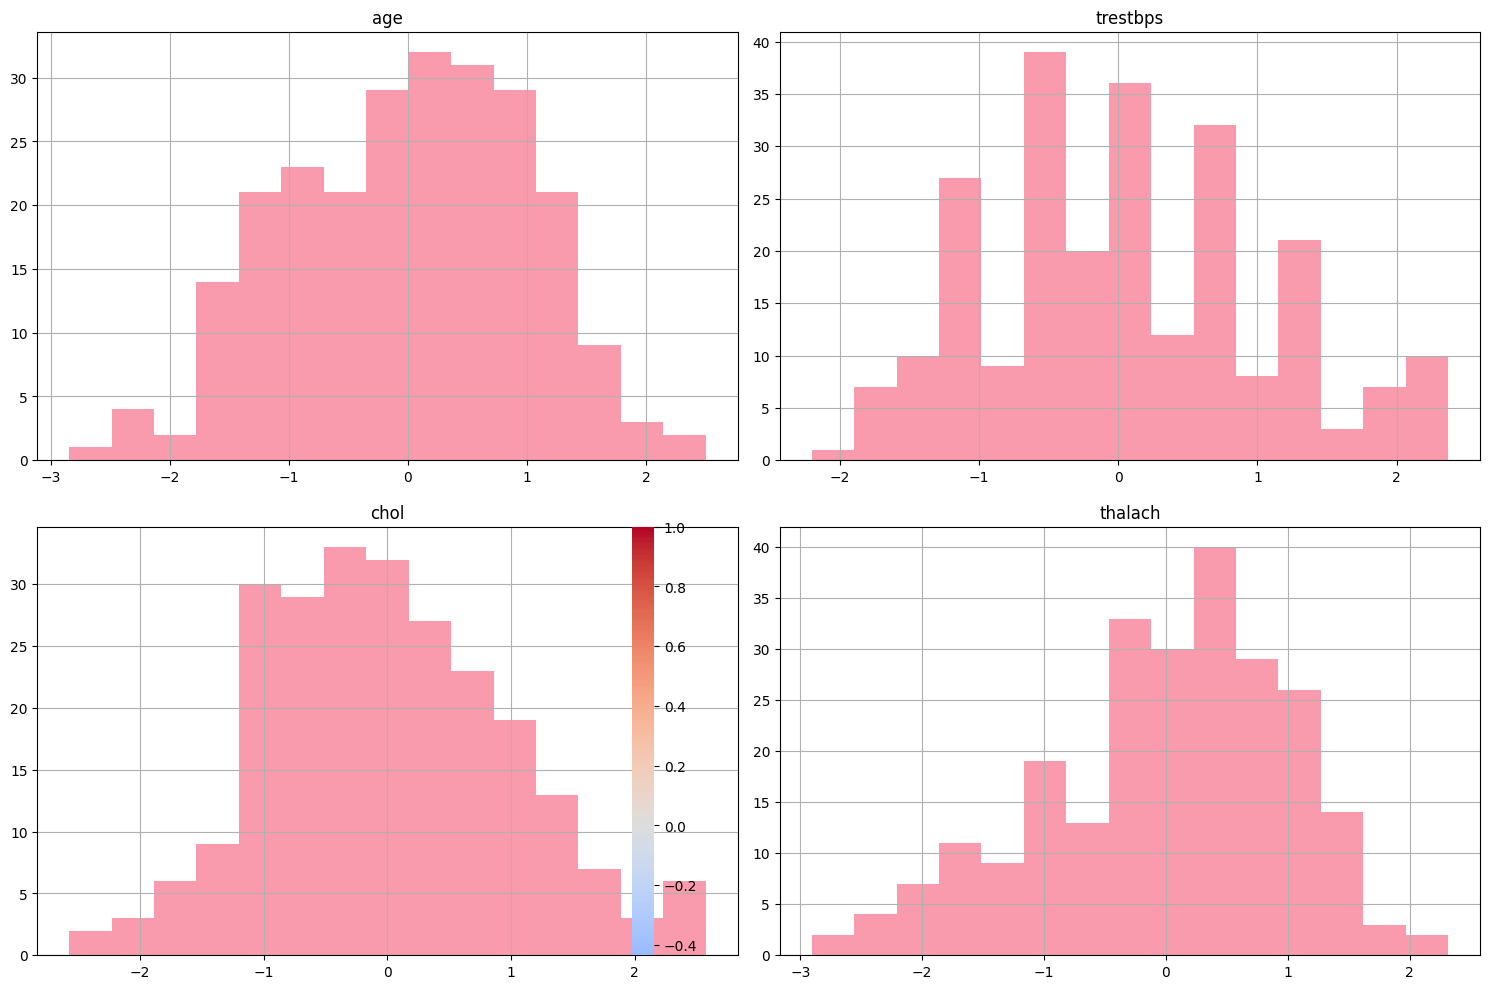

In [14]:
# Visualize the final processed data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Feature distributions in training set
X_train[['age', 'trestbps', 'chol', 'thalach']].hist(bins=15, ax=axes[0, 0], alpha=0.7)
axes[0, 0].set_title('Feature Distributions (Training Set)')

# Target distribution comparison
train_target_counts = y_train.value_counts()
test_target_counts = y_test.value_counts()

x_pos = np.arange(len(train_target_counts))
width = 0.35

axes[0, 1].bar(x_pos - width/2, train_target_counts.values, width, label='Train', alpha=0.7)
axes[0, 1].bar(x_pos + width/2, test_target_counts.values, width, label='Test', alpha=0.7)
axes[0, 1].set_xlabel('Target Class')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Target Distribution: Train vs Test')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(train_target_counts.index)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Correlation matrix of processed features
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, ax=axes[1, 0])
axes[1, 0].set_title('Feature Correlation Matrix (Processed Data)')

# Feature scaling verification (should be centered around 0 for standard scaling)
feature_means = X_train.mean()
axes[1, 1].bar(range(len(feature_means)), feature_means.values)
axes[1, 1].set_xlabel('Feature Index')
axes[1, 1].set_ylabel('Mean Value')
axes[1, 1].set_title('Feature Means After Standard Scaling')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 7. Save Processed Data

In [15]:
# Save the processed data
saved_files = processor.save_processed_data(
    preprocessing_result, 
    output_dir='../data/processed'
)

print("Saved processed data files:")
for file_type, file_path in saved_files.items():
    print(f"- {file_type}: {file_path}")
    
# Verify the main cleaned dataset
cleaned_dataset_path = saved_files['cleaned_data']
verification_df = pd.read_csv(cleaned_dataset_path)
print(f"\nVerification - Cleaned dataset shape: {verification_df.shape}")
print(f"Missing values in saved dataset: {verification_df.isnull().sum().sum()}")

2025-08-30 00:44:46 - data_processor - INFO - Saved processed data to 6 files in ../data/processed
Saved processed data files:
- cleaned_data: ..\data\processed\heart_disease_cleaned.csv
- train_data: ..\data\processed\heart_disease_train.csv
- test_data: ..\data\processed\heart_disease_test.csv
- scaler: ..\data\processed\scaler.pkl
- pipeline: ..\data\processed\preprocessing_pipeline.pkl
- metadata: ..\data\processed\preprocessing_metadata.pkl

Verification - Cleaned dataset shape: (303, 14)
Missing values in saved dataset: 0


## 8. Summary

### Preprocessing Steps Completed:

1. **Data Loading**: Successfully loaded the heart disease dataset with 303 samples and 14 features

2. **Data Cleaning**:
   - Replaced '?' values with NaN
   - Imputed missing numerical values with median
   - Imputed missing categorical values with mode
   - Converted multi-class target to binary classification (0: no disease, 1: disease)

3. **Categorical Encoding**:
   - Binary variables (sex, fbs, exang) kept as 0/1
   - Ordinal variables (cp, restecg, slope) maintained order
   - Categorical variables (ca, thal) converted to integers

4. **Outlier Handling**:
   - Used IQR method to detect outliers
   - Capped outliers to reasonable bounds instead of removing them
   - Preserved data integrity while reducing extreme values

5. **Feature Scaling**:
   - Applied StandardScaler to normalize feature distributions
   - Ensured all features have mean ≈ 0 and std ≈ 1
   - Preserved relationships between features

6. **Data Splitting**:
   - Split data into 80% training and 20% testing
   - Used stratified sampling to maintain target distribution
   - Ensured reproducibility with random_state=42

### Key Results:
- **No missing values** in the final cleaned dataset
- **Balanced preprocessing** that maintains data integrity
- **Reproducible pipeline** saved for future use
- **Ready for machine learning** with properly scaled and encoded features

The preprocessed data is now ready for machine learning model training and evaluation!